In [1]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import PIL.Image as Image

from skimage import io, color, transform
from skimage.feature import hog

import time

C:\Users\max_1\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\max_1\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\max_1\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [39]:
images = np.load('images.npy', allow_pickle=True)
labels = np.load('labels.npy', allow_pickle=True)
estados = np.load('estados.npy',allow_pickle=True)
hog = np.load('hog.npy',allow_pickle=True)
df = pd.DataFrame({'gray_matrix': images.tolist(), 'label': labels.tolist(),'estados': estados.tolist(),'hog': hog.tolist()})
df

gray_matrix     label  estados  \
0      [[46, 34, 26, 23, 12, 32, 35, 26, 26, 38, 71, ...     angry        0   
1      [[55, 33, 54, 32, 26, 21, 50, 29, 38, 45, 79, ...     angry        0   
2      [[123, 123, 126, 131, 124, 69, 109, 149, 159, ...     angry        0   
3      [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     angry        0   
4      [[127, 121, 124, 137, 123, 118, 120, 111, 111,...     angry        0   
...                                                  ...       ...      ...   
35882  [[27, 26, 26, 26, 27, 27, 28, 28, 33, 34, 35, ...  surprise        0   
35883  [[7, 6, 13, 39, 76, 58, 29, 21, 16, 20, 34, 56...  surprise        0   
35884  [[124, 129, 125, 123, 129, 128, 127, 128, 131,...  surprise        1   
35885  [[242, 242, 242, 216, 110, 42, 20, 41, 37, 14,...  surprise        0   
35886  [[194, 197, 191, 174, 160, 147, 145, 158, 155,...  surprise        0   

                                                     hog  
0      [0.33274356, 0.1704117, 0.025357863, 0.0006549...  
1      [0.27381572, 0.22986299, 0.09233569, 0.0294371...  
2      [0.34384748, 0.01883176, 0.004236705, 0.010840...  
3      [0.014489936, 0.008741817, 0.020611065, 0.0, 0...  
4      [0.25325525, 0.0767658, 0.026558537, 0.0181144...  
...                                                  ...  
35882  [0.14022486, 0.07403437, 0.0686184, 0.0, 0.041...  
35883  [0.39263126, 0.11640715, 0.0072888294, 0.00144...  
35884  [0.20560372, 0.04748373, 0.03934206, 0.0998374...  
35885  [0.3589315, 0.16316827, 0.042510495, 0.0318309...  
35886  [0.3321482, 0.3321482, 0.07540651, 0.02142311,...  

[35887 rows x 4 columns]

In [3]:
df[df['estados']==1]

gray_matrix     label  estados  \
16     [[175, 166, 185, 198, 202, 213, 212, 209, 210,...     angry        1   
23     [[26, 29, 30, 35, 45, 60, 108, 145, 161, 161, ...     angry        1   
30     [[17, 18, 19, 19, 17, 15, 16, 17, 18, 20, 18, ...     angry        1   
31     [[0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 1, 13, 37, ...     angry        1   
45     [[254, 254, 254, 254, 254, 254, 254, 254, 254,...     angry        1   
...                                                  ...       ...      ...   
35863  [[9, 38, 69, 99, 86, 102, 111, 105, 65, 58, 64...  surprise        1   
35869  [[253, 253, 254, 253, 170, 101, 105, 102, 85, ...  surprise        1   
35875  [[252, 247, 146, 93, 94, 89, 99, 94, 93, 83, 9...  surprise        1   
35878  [[33, 44, 49, 40, 35, 28, 23, 14, 9, 16, 17, 5...  surprise        1   
35884  [[124, 129, 125, 123, 129, 128, 127, 128, 131,...  surprise        1   

                                                     hog  
16     [0.20444939, 0.034390625, 0.026585897, 0.01487...  
23     [0.46974203, 0.15378156, 0.0056655, 0.0, 0.002...  
30     [0.16117984, 0.10060929, 0.12280247, 0.0026138...  
31     [0.17848918, 0.014774916, 0.0, 0.0, 0.0, 0.0, ...  
45     [0.025827257, 0.01296422, 0.020755643, 0.0, 0....  
...                                                  ...  
35863  [0.23134665, 0.3235038, 0.13396424, 0.05265233...  
35869  [0.4190711, 0.32569548, 0.0045682807, 0.002312...  
35875  [0.32172725, 0.29283354, 0.09000543, 0.0720573...  
35878  [0.20763314, 0.31089163, 0.1581842, 0.02511550...  
35884  [0.20560372, 0.04748373, 0.03934206, 0.0998374...  

[4611 rows x 4 columns]

In [4]:
under = df[df['estados']==1]

In [5]:
under

gray_matrix     label  estados  \
16     [[175, 166, 185, 198, 202, 213, 212, 209, 210,...     angry        1   
23     [[26, 29, 30, 35, 45, 60, 108, 145, 161, 161, ...     angry        1   
30     [[17, 18, 19, 19, 17, 15, 16, 17, 18, 20, 18, ...     angry        1   
31     [[0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 1, 13, 37, ...     angry        1   
45     [[254, 254, 254, 254, 254, 254, 254, 254, 254,...     angry        1   
...                                                  ...       ...      ...   
35863  [[9, 38, 69, 99, 86, 102, 111, 105, 65, 58, 64...  surprise        1   
35869  [[253, 253, 254, 253, 170, 101, 105, 102, 85, ...  surprise        1   
35875  [[252, 247, 146, 93, 94, 89, 99, 94, 93, 83, 9...  surprise        1   
35878  [[33, 44, 49, 40, 35, 28, 23, 14, 9, 16, 17, 5...  surprise        1   
35884  [[124, 129, 125, 123, 129, 128, 127, 128, 131,...  surprise        1   

                                                     hog  
16     [0.20444939, 0.034390625, 0.026585897, 0.01487...  
23     [0.46974203, 0.15378156, 0.0056655, 0.0, 0.002...  
30     [0.16117984, 0.10060929, 0.12280247, 0.0026138...  
31     [0.17848918, 0.014774916, 0.0, 0.0, 0.0, 0.0, ...  
45     [0.025827257, 0.01296422, 0.020755643, 0.0, 0....  
...                                                  ...  
35863  [0.23134665, 0.3235038, 0.13396424, 0.05265233...  
35869  [0.4190711, 0.32569548, 0.0045682807, 0.002312...  
35875  [0.32172725, 0.29283354, 0.09000543, 0.0720573...  
35878  [0.20763314, 0.31089163, 0.1581842, 0.02511550...  
35884  [0.20560372, 0.04748373, 0.03934206, 0.0998374...  

[4611 rows x 4 columns]

In [6]:
X = under['hog']
y = under['label']

In [41]:
grande = df['hog']

In [7]:
X_ex = pd.DataFrame(sexo.to_list(), columns=['col_{}'.format(i) for i in range(len(X.iloc[0]))])

# Concatenar el DataFrame original con el DataFrame expandido
X_ex

col_0     col_1     col_2     col_3     col_4     col_5     col_6  \
0     0.204449  0.034391  0.026586  0.014877  0.015419  0.007816  0.016923   
1     0.469742  0.153782  0.005666  0.000000  0.002488  0.000000  0.000000   
2     0.161180  0.100609  0.122802  0.002614  0.057684  0.000000  0.017237   
3     0.178489  0.014775  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.025827  0.012964  0.020756  0.000000  0.016660  0.000000  0.012331   
...        ...       ...       ...       ...       ...       ...       ...   
4606  0.231347  0.323504  0.133964  0.052652  0.030621  0.020680  0.008702   
4607  0.419071  0.325695  0.004568  0.002312  0.000790  0.000000  0.000119   
4608  0.321727  0.292834  0.090005  0.072057  0.035838  0.013943  0.009581   
4609  0.207633  0.310892  0.158184  0.025116  0.031039  0.021048  0.019031   
4610  0.205604  0.047484  0.039342  0.099837  0.046192  0.019924  0.008672   

         col_7     col_8     col_9  ...  col_3770  col_3771  col_3772  \
0     0.138692  0.353135  0.353135  ...  0.293263  0.293263  0.157434   
1     0.000000  0.120362  0.469742  ...  0.009483  0.005951  0.003398   
2     0.038441  0.150324  0.121406  ...  0.207103  0.125807  0.125969   
3     0.000000  0.089835  0.244837  ...  0.080870  0.137295  0.036591   
4     0.004133  0.024559  0.043178  ...  0.320644  0.320644  0.233020   
...        ...       ...       ...  ...       ...       ...       ...   
4606  0.016934  0.099779  0.336142  ...  0.332471  0.106015  0.031321   
4607  0.001446  0.049232  0.419071  ...  0.460991  0.460991  0.015502   
4608  0.068625  0.200149  0.321727  ...  0.253755  0.403790  0.114330   
4609  0.009532  0.056508  0.162867  ...  0.050493  0.014926  0.030625   
4610  0.011031  0.028598  0.413016  ...  0.376064  0.376064  0.148480   

      col_3773  col_3774  col_3775  col_3776  col_3777  col_3778  col_3779  
0     0.111023  0.050416  0.103681  0.016830  0.140722  0.293263  0.293263  
1     0.009843  0.000000  0.010499  0.000000  0.009151  0.003346  0.005862  
2     0.223889  0.060211  0.025028  0.023346  0.014264  0.058774  0.260260  
3     0.099380  0.002933  0.343563  0.013380  0.136570  0.049739  0.137105  
4     0.078294  0.052033  0.094321  0.016103  0.035602  0.278554  0.320644  
...        ...       ...       ...       ...       ...       ...       ...  
4606  0.041247  0.005974  0.047461  0.014291  0.050470  0.353121  0.353121  
4607  0.000411  0.000000  0.004805  0.002823  0.016557  0.039792  0.460991  
4608  0.007518  0.003627  0.014407  0.002928  0.000692  0.010068  0.400781  
4609  0.069392  0.154199  0.124760  0.027728  0.007257  0.004367  0.010415  
4610  0.044211  0.004699  0.012126  0.021746  0.089770  0.121457  0.376064  

[4611 rows x 3780 columns]

In [42]:
grande_ex = pd.DataFrame(grande.to_list(), columns=['col_{}'.format(i) for i in range(len(grande.iloc[0]))])

# Concatenar el DataFrame original con el DataFrame expandido
grande_ex

col_0     col_1     col_2     col_3     col_4     col_5     col_6  \
0      0.332744  0.170412  0.025358  0.000655  0.022267  0.018140  0.007194   
1      0.273816  0.229863  0.092336  0.029437  0.040683  0.032920  0.055008   
2      0.343847  0.018832  0.004237  0.010840  0.051225  0.066568  0.125589   
3      0.014490  0.008742  0.020611  0.000000  0.003538  0.000000  0.000000   
4      0.253255  0.076766  0.026559  0.018114  0.066990  0.066847  0.109872   
...         ...       ...       ...       ...       ...       ...       ...   
35882  0.140225  0.074034  0.068618  0.000000  0.041931  0.000000  0.020199   
35883  0.392631  0.116407  0.007289  0.001446  0.010361  0.005202  0.004327   
35884  0.205604  0.047484  0.039342  0.099837  0.046192  0.019924  0.008672   
35885  0.358932  0.163168  0.042510  0.031831  0.012726  0.005683  0.023967   
35886  0.332148  0.332148  0.075407  0.021423  0.016324  0.000000  0.013454   

          col_7     col_8     col_9  ...  col_3770  col_3771  col_3772  \
0      0.020632  0.198169  0.332744  ...  0.310090  0.286404  0.195494   
1      0.133836  0.273816  0.184969  ...  0.402068  0.292945  0.028301   
2      0.040018  0.250965  0.308957  ...  0.170359  0.264527  0.084807   
3      0.003168  0.016840  0.045529  ...  0.383877  0.383877  0.027775   
4      0.117465  0.262534  0.224400  ...  0.403928  0.403928  0.007402   
...         ...       ...       ...  ...       ...       ...       ...   
35882  0.008905  0.104631  0.153483  ...  0.077044  0.043578  0.166184   
35883  0.011350  0.208067  0.392631  ...  0.186986  0.384594  0.362517   
35884  0.011031  0.028598  0.413016  ...  0.376064  0.376064  0.148480   
35885  0.023031  0.239601  0.358932  ...  0.309040  0.073685  0.035393   
35886  0.039235  0.062978  0.332148  ...  0.046104  0.132624  0.034793   

       col_3773  col_3774  col_3775  col_3776  col_3777  col_3778  col_3779  
0      0.100985  0.060232  0.031848  0.033936  0.055036  0.177480  0.310090  
1      0.038236  0.042505  0.024638  0.002044  0.031463  0.402068  0.402068  
2      0.072255  0.032305  0.147855  0.001396  0.121163  0.230844  0.313407  
3      0.003701  0.000064  0.007491  0.000172  0.000929  0.009918  0.314254  
4      0.000577  0.000126  0.006054  0.004480  0.009092  0.062778  0.403928  
...         ...       ...       ...       ...       ...       ...       ...  
35882  0.534020  0.534020  0.262403  0.011854  0.060687  0.031405  0.037481  
35883  0.037155  0.001413  0.004973  0.001009  0.001758  0.012873  0.117070  
35884  0.044211  0.004699  0.012126  0.021746  0.089770  0.121457  0.376064  
35885  0.029031  0.035731  0.012986  0.023263  0.076974  0.309040  0.309040  
35886  0.016489  0.000000  0.012720  0.004422  0.018757  0.007853  0.033960  

[35887 rows x 3780 columns]

In [45]:
y_2 = df['label']
y_2

0           angry
1           angry
2           angry
3           angry
4           angry
           ...   
35882    surprise
35883    surprise
35884    surprise
35885    surprise
35886    surprise
Name: label, Length: 35887, dtype: object

In [8]:
from sklearn.manifold import TSNE

C:\Users\max_1\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


C:\Users\max_1\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [11]:
labels

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

C:\Users\max_1\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



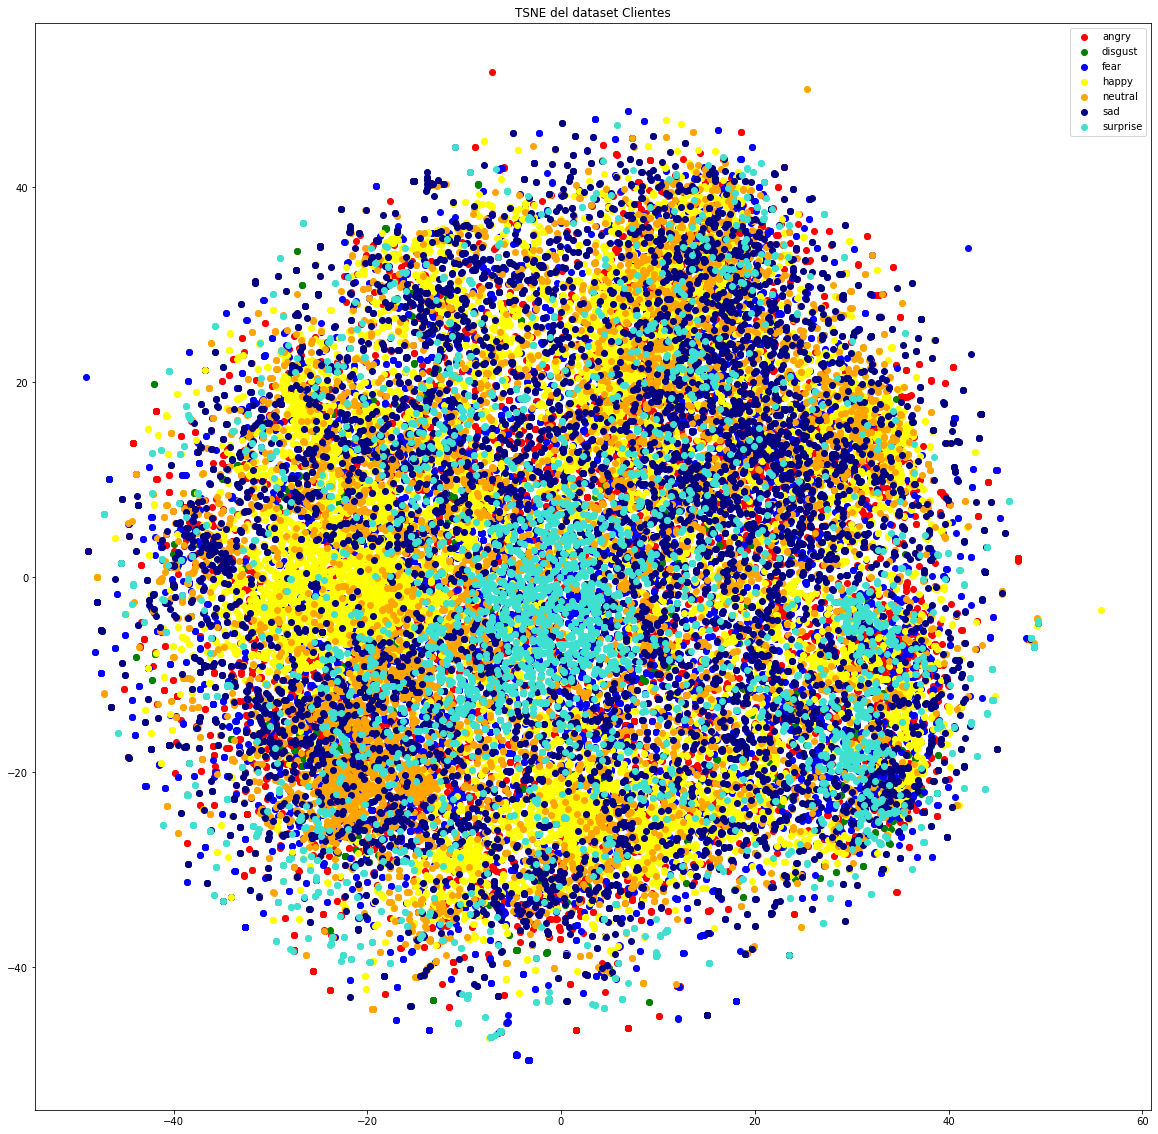

In [47]:
tsn = TSNE(n_components=2,perplexity=50,n_iter=1000)
X_r3 = tsn.fit_transform(grande_ex)
labels=y.unique().tolist()
colors = ['navy', 'turquoise', 'darkorange','red','blue','green','yellow']

plt.figure(figsize=(20,20))
for c, i, target_name in zip(['red','green','blue','yellow','orange','navy','turquoise'], labels, labels):
      plt.scatter(X_r3[y_2 == i, 0], X_r3[y_2 == i, 1], c=c, label=target_name)
plt.legend()
plt.title('TSNE del dataset Clientes')
plt.show()

In [24]:
import plotly.express as px
from sklearn.manifold import TSNE

# Suponiendo que X_ex y y son tus datos
tsn = TSNE(n_components=3, perplexity=25, n_iter=5000)
X_r3 = tsn.fit_transform(X_ex)

# Añade las nuevas dimensiones a tus datos
df = pd.DataFrame({'Dim1': X_r3[:, 0], 'Dim2': X_r3[:, 1], 'Dim3': X_r3[:, 2], 'Label': y})



C:\Users\max_1\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [31]:
# Plotea con plotly express
fig = px.scatter_3d(df, x='Dim1', y='Dim2', z='Dim3', color='Label', title='t-SNE del dataset Clientes en 3D',width=1000,height=1000)
fig.show()

In [32]:
from sklearn.decomposition import PCA

In [34]:
# aplica transformacion PCA
pca = PCA(n_components=3) # define el transformador PCA con n_componentes

fit_pca = pca.fit(X_ex)   # ajusta el transformador PCA con los datos estandarizados o Data sin oultilers
X_pca = fit_pca.transform(X_ex) # obtiene los datos pca transformados (el resultado es un array numpy)

print("Componentes principales:")
print(fit_pca.components_) #Componentes principales

C:\Users\max_1\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



Componentes principales:
[[-0.02257651 -0.01628897  0.0094514  ...  0.00128689  0.00016503
  -0.00958962]
 [ 0.01091518 -0.01079865 -0.00329614 ... -0.00288664 -0.00757529
  -0.01062535]
 [ 0.00412295  0.01637498 -0.00312029 ... -0.00374587 -0.00381435
   0.01381241]]


C:\Users\max_1\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [35]:
# por conveniencia castea la data en un DataFrame
X_transformed_pca = pd.DataFrame(X_pca)
X_transformed_pca = X_transformed_pca[[0, 1, 2]]
X_transformed_pca.columns = ['PC0', 'PC1', 'PC2']  #X_transformed_pca.rename(columns={0:'PC0',1:'PC1',2:'PC2'})
df_new = pd.merge(X_transformed_pca, y,left_index=True, right_index=True)
df_new

PC0       PC1       PC2    label
16   -1.643001 -0.311972  0.303761    angry
23    1.679176  1.361437  0.129730    angry
30   -0.537670 -0.854175  0.464364    angry
31    0.103106 -0.873223  0.191379    angry
45   -0.810664  0.410186 -2.022412    angry
...        ...       ...       ...      ...
4559  0.029039 -0.295032  0.309902  neutral
4581 -1.212967 -1.719436  0.823781  neutral
4583 -0.272627 -2.234184  0.032334  neutral
4600 -0.490996 -1.427508  1.620367  neutral
4607 -0.434068 -1.357767  0.648403  neutral

[628 rows x 4 columns]

In [38]:
import plotly.express as px
import plotly.express.colors
# Visualizamos en 3D

figure = px.scatter_3d(df_new, x='PC0', y='PC1', z='PC2',
                       color='label',  size_max=5,opacity=0.7,
                       #symbol = 'diagnostico',
                       #size = 'diagnostico',
                       width=500, height=500)
# Ajusta los márgenes si es necesario
figure.update_layout(margin=dict(l=0, r=0, b=0, t=0))

figure.show()